# Proyecto análisis ventas

Autor: Pablo Ledesma Hernández

# Lectura de fichero

In [2]:
import csv
import math
from collections import namedtuple
from datetime import datetime
from matplotlib import pyplot as plt

In [3]:
Ventas = namedtuple('Ventas', 'OrderDate, Region, City, Category, Product, Quantity, UnitPrice, TotalPrice')
def lee_ventas(ventas):
  
    with open('ventas.csv', encoding='utf-8') as f:
        lector = csv.reader(f)
        next(lector)
        ventas = [Ventas(OrderDate, Region, City, Category, Product, int(Quantity), float(UnitPrice), float(TotalPrice)) for OrderDate, Region, City, Category, Product, Quantity, UnitPrice, TotalPrice in lector]
        return ventas
        
    


In [4]:
ventas = lee_ventas("ventas.csv")
print(ventas[:15])




[Ventas(OrderDate='01/01/2020', Region='East', City='Boston', Category='Bars', Product='Carrot', Quantity=33, UnitPrice=1.77, TotalPrice=58.41), Ventas(OrderDate='04/01/2020', Region='East', City='Boston', Category='Crackers', Product='Whole Wheat', Quantity=87, UnitPrice=3.49, TotalPrice=303.63), Ventas(OrderDate='07/01/2020', Region='West', City='Los Angeles', Category='Cookies', Product='Chocolate Chip', Quantity=58, UnitPrice=1.87, TotalPrice=108.46), Ventas(OrderDate='10/01/2020', Region='East', City='New York', Category='Cookies', Product='Chocolate Chip', Quantity=82, UnitPrice=1.87, TotalPrice=153.34), Ventas(OrderDate='13/01/2020', Region='East', City='Boston', Category='Cookies', Product='Arrowroot', Quantity=38, UnitPrice=2.18, TotalPrice=82.84), Ventas(OrderDate='16/01/2020', Region='East', City='Boston', Category='Bars', Product='Carrot', Quantity=54, UnitPrice=1.77, TotalPrice=95.58), Ventas(OrderDate='19/01/2020', Region='East', City='Boston', Category='Crackers', Produc

# Filtrado: selección de filas

Se muestran aquellas filas en las que el precio total es mayor que 500

In [4]:
def factura(ventas, total):
    return[p for p in ventas if p.TotalPrice>=total]

In [5]:
factura(ventas,500)

[Ventas(OrderDate='19/01/2020', Region='East', City='Boston', Category='Crackers', Product='Whole Wheat', Quantity=149, UnitPrice=3.49, TotalPrice=520.01),
 Ventas(OrderDate='29/03/2020', Region='East', City='Boston', Category='Cookies', Product='Oatmeal Raisin', Quantity=193, UnitPrice=2.84, TotalPrice=548.12),
 Ventas(OrderDate='03/06/2020', Region='West', City='Los Angeles', Category='Cookies', Product='Oatmeal Raisin', Quantity=288, UnitPrice=2.84, TotalPrice=817.92),
 Ventas(OrderDate='21/06/2020', Region='West', City='Los Angeles', Category='Bars', Product='Carrot', Quantity=306, UnitPrice=1.77, TotalPrice=541.62),
 Ventas(OrderDate='24/12/2020', Region='East', City='New York', Category='Cookies', Product='Arrowroot', Quantity=237, UnitPrice=2.18, TotalPrice=516.66)]

# Filtrado: selección de columnas

Se muestran la ciudad, fecha y número de unidades en los que se han vendido un determinado producto, en este caso zanahorias.

In [7]:
def compras_producto(ventas, Producto):
    return[(p.City, p.OrderDate, p.Quantity) for p in ventas if (Producto==p.Product) ]

In [8]:
compras_producto(ventas,'Carrot')

[('Boston', '01/01/2020', 33),
 ('Boston', '16/01/2020', 54),
 ('Los Angeles', '22/01/2020', 51),
 ('New York', '25/01/2020', 100),
 ('Los Angeles', '09/02/2020', 44),
 ('New York', '12/02/2020', 23),
 ('Boston', '08/03/2020', 61),
 ('New York', '17/03/2020', 38),
 ('Los Angeles', '01/04/2020', 58),
 ('New York', '07/04/2020', 91),
 ('Boston', '16/04/2020', 48),
 ('Los Angeles', '22/04/2020', 20),
 ('New York', '25/04/2020', 53),
 ('Los Angeles', '10/05/2020', 25),
 ('New York', '16/05/2020', 61),
 ('Boston', '28/05/2020', 58),
 ('San Diego', '09/06/2020', 42),
 ('Boston', '15/06/2020', 75),
 ('Los Angeles', '21/06/2020', 306),
 ('San Diego', '03/07/2020', 52),
 ('Boston', '09/07/2020', 136),
 ('New York', '08/08/2020', 24),
 ('Boston', '20/08/2020', 109),
 ('San Diego', '04/09/2020', 45),
 ('Boston', '10/09/2020', 143),
 ('Los Angeles', '16/09/2020', 133),
 ('Boston', '01/10/2020', 77),
 ('Los Angeles', '07/10/2020', 40),
 ('New York', '16/10/2020', 141),
 ('San Diego', '22/10/2020', 

# Valores únicos de una columna

Se muestran los distintos valores posibles para la categoría de productos.

In [9]:
def productos_vendidos():
    return{p.Product for p in ventas}  

In [10]:
productos_vendidos()

{'Arrowroot',
 'Banana',
 'Bran',
 'Carrot',
 'Chocolate Chip',
 'Oatmeal Raisin',
 'Potato Chips',
 'Pretzels',
 'Whole Wheat'}

# Número de pedidos de X producto

In [11]:
def numero_pedidos_producto(producto):
    return[p.Product for p in ventas if producto==p.Product]

In [13]:
numero= len(numero_pedidos_producto('Carrot'))
print("El número de pedidos es", (numero))

El número de pedidos es 64


# Ordenación basada en un criterio

Se muestra el precio total y la ciudad, ordenadas de mayor a menor en función del precio total.

In [9]:
def mayor_factura():
    precio = [(p.TotalPrice, p.City) for p in ventas]
    precio.sort(key= lambda x:x[0], reverse= True)
    return precio[:20]



In [10]:
mayor_factura()


[(817.92, 'Los Angeles'),
 (548.12, 'Boston'),
 (541.62, 'Los Angeles'),
 (520.01, 'Boston'),
 (516.66, 'New York'),
 (488.32, 'New York'),
 (458.15, 'Boston'),
 (433.84, 'Los Angeles'),
 (394.57, 'Boston'),
 (391.92, 'Boston'),
 (389.08, 'Boston'),
 (381.5, 'New York'),
 (366.36, 'Boston'),
 (352.16, 'Boston'),
 (349.32, 'Boston'),
 (349.32, 'Boston'),
 (340.8, 'Boston'),
 (318.28, 'New York'),
 (303.63, 'Boston'),
 (303.02, 'San Diego')]

# Agrupación en un diccionario

In [14]:
def pedidos_de_productos():
    compras_por_producto = dict()
    productos={p.Product for p in ventas}
    for p in productos:
        compras_por_producto[p] = [(e.OrderDate, e.City, e.Quantity) for e in ventas if e.Product ==p]
    return(compras_por_producto)


In [15]:
pedidos_de_productos()

{'Chocolate Chip': [('07/01/2020', 'Los Angeles', 58),
  ('10/01/2020', 'New York', 82),
  ('03/02/2020', 'Boston', 31),
  ('02/03/2020', 'New York', 85),
  ('14/03/2020', 'Los Angeles', 86),
  ('23/03/2020', 'San Diego', 39),
  ('01/05/2020', 'San Diego', 63),
  ('22/05/2020', 'San Diego', 55),
  ('06/06/2020', 'New York', 76),
  ('15/07/2020', 'Los Angeles', 75),
  ('05/08/2020', 'Los Angeles', 107),
  ('14/08/2020', 'San Diego', 70),
  ('26/08/2020', 'Los Angeles', 80),
  ('22/09/2020', 'New York', 65),
  ('28/10/2020', 'Boston', 49),
  ('12/12/2020', 'Boston', 36),
  ('27/12/2020', 'New York', 65),
  ('07/02/2021', 'Los Angeles', 34),
  ('28/02/2021', 'Los Angeles', 232),
  ('22/04/2021', 'San Diego', 67),
  ('04/05/2021', 'Los Angeles', 58),
  ('13/05/2021', 'San Diego', 82),
  ('22/05/2021', 'Los Angeles', 43),
  ('27/06/2021', 'Boston', 38),
  ('12/07/2021', 'New York', 40),
  ('21/07/2021', 'Boston', 32),
  ('30/07/2021', 'Los Angeles', 64),
  ('10/10/2021', 'New York', 23),
  

# Filtrar por pedidos realizados a cada ciudad

In [16]:
def filtrar_por_ciudad(ventas,City):
    numero=[p.City for p in ventas if (City==p.City)]
    numero_de_pedidos=len(numero)
    return(City, numero_de_pedidos)

In [17]:
a =filtrar_por_ciudad(ventas, 'Los Angeles')
print("El número de pedidos realizados en", a[0], "es de", a[1])

El número de pedidos realizados en Los Angeles es de 55


# Gráfica: Precio de pedidos

In [33]:
def muestra_precio_pedidos(Ventas):
    precio = [p.TotalPrice for p in ventas]
    plt.plot(precio, label='ventas')
    plt.legend()
    plt.show()

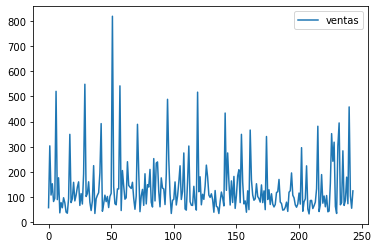

In [37]:
muestra_precio_pedidos('Ventas')

# Gráfica: Ciudades y precio del pedido

In [18]:
def ventas_totales_ciudad(ventas, ciudades):
    
    registros=[r for r in ventas if r.City in ciudades]
    l_ciudades= list({r.City for r in registros})
    l_precio=[sum(r.TotalPrice for r in registros if r.City ==city) for city in l_ciudades]
    indice = range(len(l_ciudades))
    plt.bar(indice, l_precio)
    plt.xticks(indice, l_ciudades, fontsize=8)
    plt.show()

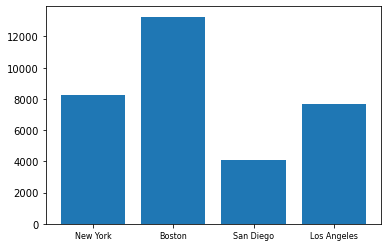

In [17]:
ventas_totales_ciudad(ventas, ['Boston', 'Los Angeles', 'New York', 'San Diego'])